In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv('./final_data_for_modeling.csv')

# NLP

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [4]:
tweets.isnull().sum()

tweet    75
class     0
dtype: int64

In [5]:
tweets = tweets.dropna()

In [6]:
tweets

,tweet,class
0,If you are heading to and beyond going SB on ...,0
1,"Due to bridge repairs, TxDOT has closed two al...",0
2,Good news. All mainlanes of I-45 N Frwy NB bet...,0
3,I-45 Northbound direct connector project conti...,0
4,Two incident on I-10 Katy Frwy are significant...,0
...,...,...
15471,BEYOND HEROES | Catastrophic Medical Operatio...,1
15472,Emergency crews cleared. all lanes open in Wes...,1
15473,Thank you for sharing our map of flood-prone s...,1
15474,Reports of street flooding in Stafford. Heavy ...,1


In [7]:
stops = stopwords.words('english')

add_stops = ['http', 'https', 'www', 'org', 'remove', 'removed']

for i in add_stops:
    stops.append(i)

stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
X = tweets['tweet']
y = tweets['class'] # 0 represents a possible road closure. 1 is something else.

# Vectorizing and EDA

# Count Vectorizer (1, 2)

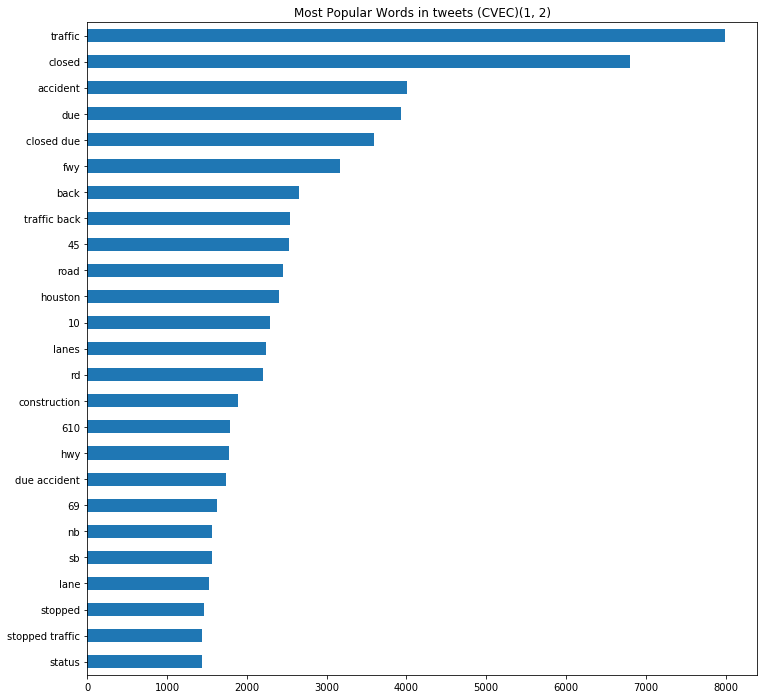

In [9]:
# Beginning with Default Vectorizers

cvec = CountVectorizer(min_df=3,
                       ngram_range=(1, 2),
                       stop_words = stops)

cvec_tweets = cvec.fit_transform(X)

cvec_tweets_df = pd.DataFrame(cvec_tweets.todense(), columns = cvec.get_feature_names())

fig , ax = plt.subplots(figsize=(12,12))
ax.set_title('Most Popular Words in tweets (CVEC)(1, 2)');
cvec_tweets_df.sum().sort_values().tail(25).plot.barh();
plt.savefig('Most Popular Words in tweets.png')

In [10]:
cvec_tweet_cols = cvec_tweets_df.columns

In [11]:
cvec_tweet_cols = list(cvec_tweet_cols)
cvec_tweet_cols
for i in cvec_tweet_cols:
    if i == 'road closures':
        print(i)

road closures


In [12]:
cvec_tweet_cols;

In [13]:
cvec_tweets_df['road closures'].sum()

99

# TFIDF Vectorizer (1, 2)

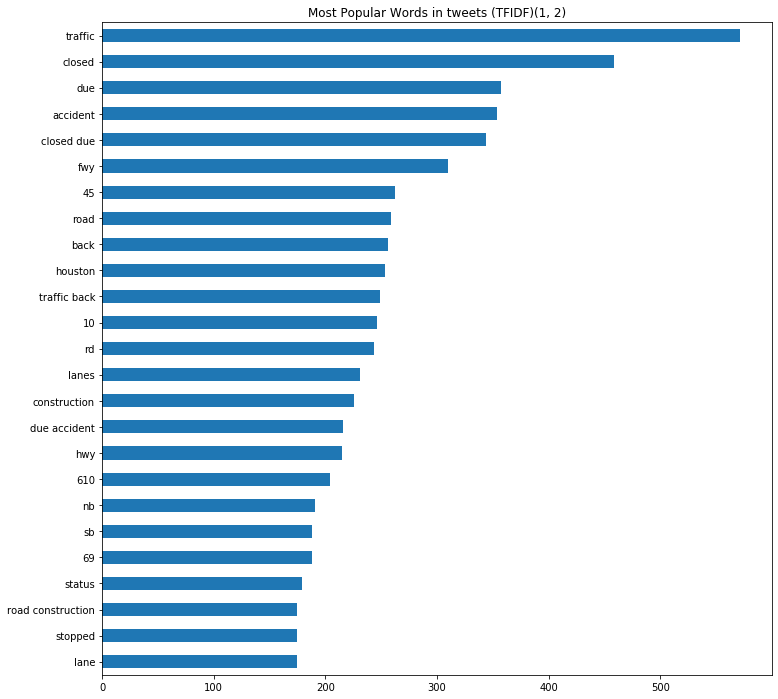

In [14]:
tfidf = TfidfVectorizer(min_df=3,
                        ngram_range=(1, 2),
                        stop_words = stops)

tfidf_tweets = tfidf.fit_transform(X)

tfidf_tweets_df = pd.DataFrame(tfidf_tweets.todense(), columns = tfidf.get_feature_names())

fig , ax = plt.subplots(figsize=(12,12))
ax.set_title('Most Popular Words in tweets (TFIDF)(1, 2)');
tfidf_tweets_df.sum().sort_values().tail(25).plot.barh();
plt.savefig('Most Popular Words in tweets.png')

# Count Vectorizer (2, 2)

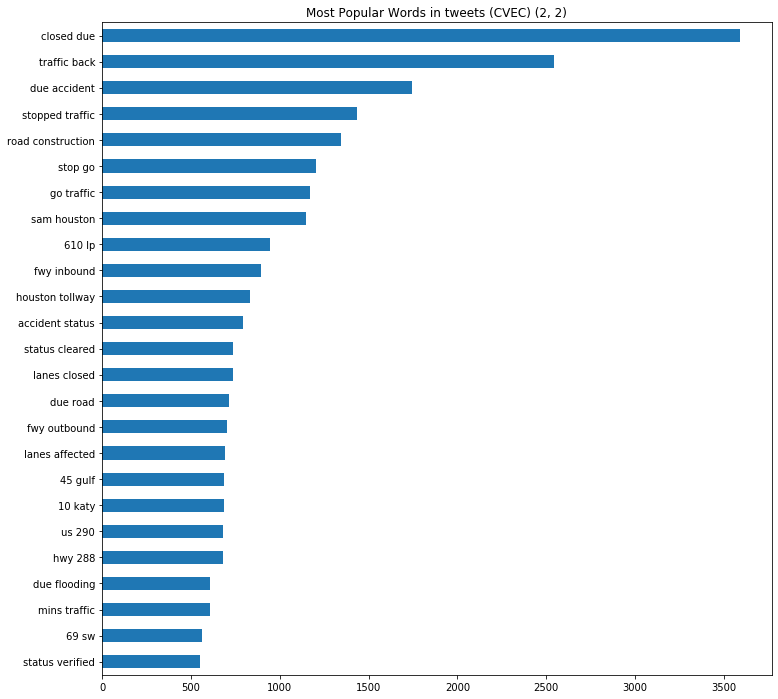

In [15]:
# Beginning with Default Vectorizers

cvec = CountVectorizer(min_df=3,
                       ngram_range=(2, 2),
                       stop_words = stops)

cvec_tweets = cvec.fit_transform(X)

cvec_tweets_df = pd.DataFrame(cvec_tweets.todense(), columns = cvec.get_feature_names())

fig , ax = plt.subplots(figsize=(12,12))
ax.set_title('Most Popular Words in tweets (CVEC) (2, 2)');
cvec_tweets_df.sum().sort_values().tail(25).plot.barh();
plt.savefig('Most Popular Words in tweets.png')

# TFIDF Vectorizer (2, 2)

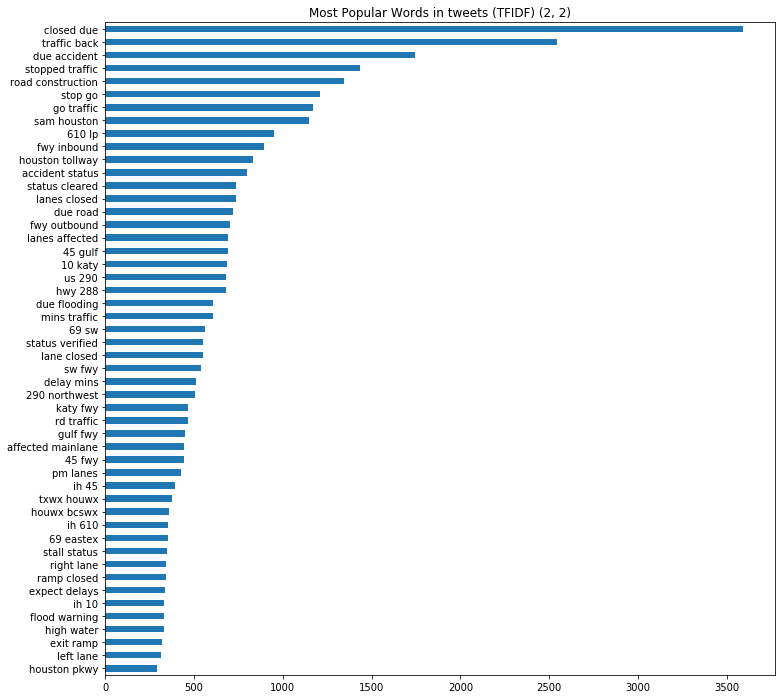

In [16]:
# Beginning with Default Vectorizers

tfidf = TfidfVectorizer(min_df=3,
                        ngram_range=(2, 2),
                        stop_words = stops)

tfidf_tweets = tfidf.fit_transform(X)

tfidf_tweets_df = pd.DataFrame(tfidf_tweets.todense(), columns = tfidf.get_feature_names())

fig , ax = plt.subplots(figsize=(12,12))
ax.set_title('Most Popular Words in tweets (TFIDF) (2, 2)');
cvec_tweets_df.sum().sort_values().tail(50).plot.barh();
plt.savefig('Most Popular Words in tfidf 2,2 tweets.png')

# TFIDF Vectorizer (3, 3)

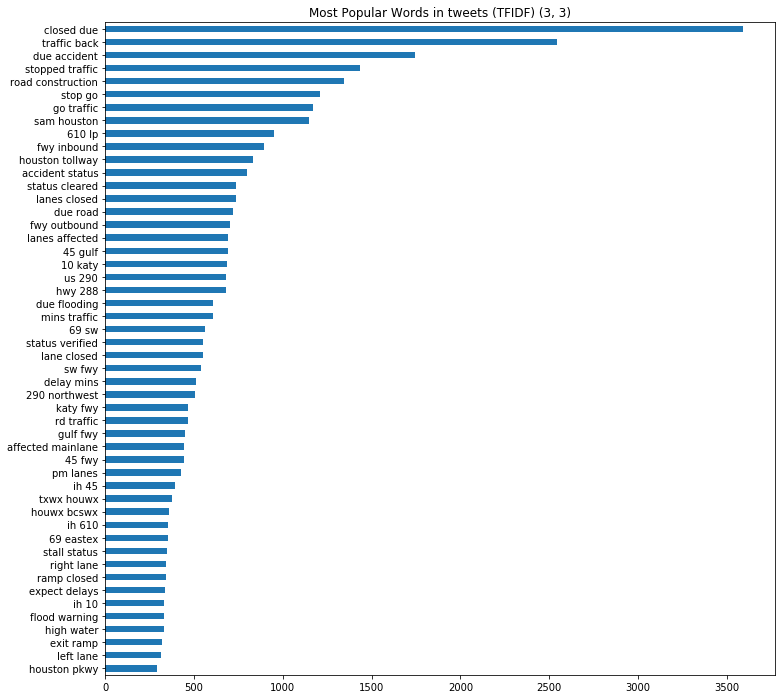

In [19]:
tfidf = TfidfVectorizer(min_df=3,
                        ngram_range=(3, 3),
                        stop_words = stops)

tfidf_tweets = tfidf.fit_transform(X)

tfidf_tweets_df = pd.DataFrame(tfidf_tweets.todense(), columns = tfidf.get_feature_names())

fig , ax = plt.subplots(figsize=(12,12))
ax.set_title('Most Popular Words in tweets (TFIDF) (3, 3)');
cvec_tweets_df.sum().sort_values().tail(50).plot.barh();
plt.savefig('Most Popular Words in tfidf 3,3 tweets.png')

# Modeling

In [17]:
# tfidf train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_tweets,
                                                   y,
                                                    test_size = .25,
                                                   random_state = 78741)

In [18]:
logreg_tfidf = LogisticRegression(solver='lbfgs')

In [19]:
logreg_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
print(f'Logreg Tfidf Score: {logreg_tfidf.score(X_test_tfidf, y_test_tfidf)}')

Logreg Tfidf Score: 0.9514411841080239


In [21]:
svc_tfidf = SVC(gamma='scale')

In [22]:
svc_tfidf.fit(X_train_tfidf, y_train_tfidf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
print(f'SVC Tfidf Score: {svc_tfidf.score(X_test_tfidf, y_test_tfidf)}')

SVC Tfidf Score: 0.9618280965982862


In [32]:
# cvec train test split
X_train_cvec, X_test_cvec, y_train_cvec, y_test_cvec = train_test_split(cvec_tweets,
                                                   y,
                                                    test_size = .25,
                                                   random_state = 78741)

In [26]:
logreg_cvec = LogisticRegression(solver='lbfgs')

In [27]:
svc_cvec = SVC(gamma='scale')

In [28]:
logreg_cvec.fit(X_train_cvec, y_train_cvec)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
svc_cvec.fit(X_train_cvec, y_train_cvec)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
print(f'Logreg Count Vectorizer Score: {logreg_cvec.score(X_test_cvec, y_test_cvec)}')

Logreg Count Vectorizer Score: 0.9639054790963386


In [31]:
print(f'SVC Count Vectorizer Score: {svc_cvec.score(X_test_cvec, y_test_cvec)}')

SVC Count Vectorizer Score: 0.9628667878473124
